1 (152, 152, 3)
2 (152, 152, 3)
3 (152, 152, 3)
4 (152, 152, 3)
5 (152, 152, 3)
6 (152, 152, 3)
7 (152, 152, 3)
8 (152, 152, 3)
9 (152, 152, 3)
10 (152, 152, 3)
11 (152, 152, 3)
12 (152, 152, 3)
13 (152, 152, 3)
14 (152, 152, 3)


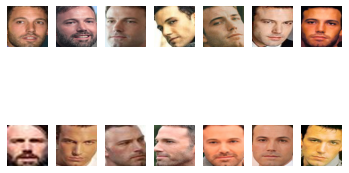

In [6]:
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(152, 152)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# specify folder to plot
folder = 'celeb_faces/train/ben_afflek/'
i = 1
# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    pyplot.subplot(2, 7, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

In [7]:
# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
    return faces

In [8]:
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [9]:
import numpy as np
# load train dataset
trainX, trainy = load_dataset('celeb_faces/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('celeb_faces/val/')
# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-dataset-deepface.npz', trainX, trainy, testX, testy)

>loaded 22 examples for class: mindy_kaling
>loaded 14 examples for class: ben_afflek
>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
(93, 152, 152, 3) (93,)
>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna


In [10]:
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

NameError: name 'LabelEncoder' is not defined

In [ ]:
# load the face dataset
import numpy as np
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

In [ ]:
i = 1
for file in trainX[0:14]:
    # path
    pyplot.subplot(2, 7, i)
    pyplot.axis('off')
    pyplot.imshow(file)
    i += 1
pyplot.show()